## imports

In [1]:
import os
import sys
sys.path.append("../")

import math

import pandas as pd
import numpy as np
import datetime as dt
import re

import pymc3 as pm

import altair as alt
alt.data_transformers.disable_max_rows()

from src.preprocess.preprocess import load_data, split_last
from src.plot.altair import plot_decompose, plot_all
from src.forecast.forecast import determine_estimates_minmax, forecast

In [2]:
boxid = [
    "ESD.000088-1",
    "063.623-1",
    "VRY.CHOPS-1",
    "HVT.111153-1",
    "TTR.251049-1",
    "BGL.CROLA-1",
][3]

## load data

In [3]:
%%time
df_data, df_meta = load_data(boxid=boxid)
plot_all(df_data=df_data)

[Thu, 28 Oct 2021 16:38:03] INFO [snowflake.py.read_meta] reading meta preprocess
[Thu, 28 Oct 2021 16:38:03] INFO [snowflake.py.read_meta] for boxids: HVT.111153-1
[Thu, 28 Oct 2021 16:38:07] INFO [snowflake.py.read_week_extremes] reading extremes table
[Thu, 28 Oct 2021 16:38:09] INFO [preprocess.py.too_short] checking number of preprocess points (<=104)


INFO:SPARK:checking number of preprocess points (<=104)


[Thu, 28 Oct 2021 16:38:09] INFO [preprocess.py.too_small] checking absolute values (<0.5)


INFO:SPARK:checking absolute values (<0.5)


[Thu, 28 Oct 2021 16:38:09] INFO [preprocess.py.remove_leading_idling] removing leading low values (<0.01)


INFO:SPARK:removing leading low values (<0.01)


[Thu, 28 Oct 2021 16:38:09] INFO [preprocess.py.too_short] checking number of preprocess points (<=104)


INFO:SPARK:checking number of preprocess points (<=104)


CPU times: user 758 ms, sys: 114 ms, total: 871 ms
Wall time: 6.75 s


alt.LayerChart(...)

## split in train + test

In [4]:
df_train, df_test = split_last(df_data.copy())

## estimate parameters + forecast

[Thu, 28 Oct 2021 16:38:10] INFO [forecast.py.determine_estimates_minmax] forecast for weekly min


INFO:SPARK:forecast for weekly min


[Thu, 28 Oct 2021 16:38:10] INFO [forecast.py.determine_estimates] add forecast horizon


INFO:SPARK:add forecast horizon


[Thu, 28 Oct 2021 16:38:10] INFO [forecast.py.determine_estimates] scale data


INFO:SPARK:scale data


[Thu, 28 Oct 2021 16:38:10] INFO [forecast.py.determine_estimates] setup model


INFO:SPARK:setup model


[Thu, 28 Oct 2021 16:38:10] INFO [model.py.create_model] creating PYMC3 model


INFO:SPARK:creating PYMC3 model


[Thu, 28 Oct 2021 16:38:10] INFO [model.py.create_model] polynomial order = 2 for drift/trend


INFO:SPARK:polynomial order = 2 for drift/trend


[Thu, 28 Oct 2021 16:38:10] INFO [model.py.create_model] fourier order = 5 for seasonality


INFO:SPARK:fourier order = 5 for seasonality
/Users/Bram.Vonk/Projects/JADS/21_spark/notebooks/../src/model/model.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = np.power(t[:, None], p)
/Users/Bram.Vonk/Projects/JADS/21_spark/notebooks/../src/model/model.py:55: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x * t[:, None]
/usr/local/Caskroom/miniconda/base/envs/spark/lib/python3.8/site-packages/pymc3/model.py:1755: ImputationWarning: Data in Σ contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


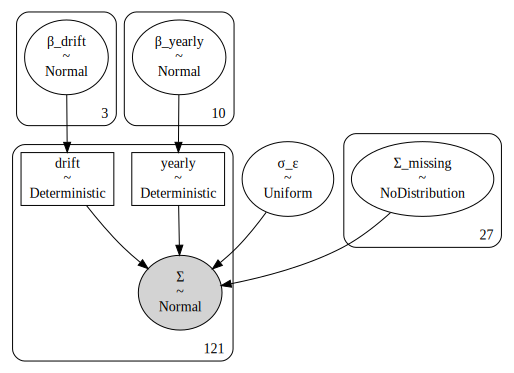

[Thu, 28 Oct 2021 16:38:18] INFO [forecast.py.determine_estimates] tune and sample model


INFO:SPARK:tune and sample model
/Users/Bram.Vonk/Projects/JADS/21_spark/notebooks/../src/forecast/forecast.py:67: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Σ_missing, σ_ε, β_yearly, β_drift]
INFO:pymc3:NUTS: [Σ_missing, σ_ε, β_yearly, β_drift]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/usr/local/Caskroom/miniconda/base/envs/spark/lib/python3.8/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warni

[Thu, 28 Oct 2021 16:38:59] INFO [forecast.py.determine_estimates] scale ouput data back


INFO:SPARK:scale ouput data back


[Thu, 28 Oct 2021 16:38:59] INFO [forecast.py.determine_estimates] format output data


INFO:SPARK:format output data


[Thu, 28 Oct 2021 16:38:59] INFO [format.py.format_model_estimates] calculating bands for quantiles: [1, 5, 50, 95, 99]


INFO:SPARK:calculating bands for quantiles: [1, 5, 50, 95, 99]


[Thu, 28 Oct 2021 16:38:59] INFO [format.py.format_model_estimates] calculating bands for variable: drift


INFO:SPARK:calculating bands for variable: drift


[Thu, 28 Oct 2021 16:38:59] INFO [format.py.format_model_estimates] calculating bands for variable: yearly


INFO:SPARK:calculating bands for variable: yearly


[Thu, 28 Oct 2021 16:38:59] INFO [format.py.format_model_estimates] calculating bands for variable: Σ


INFO:SPARK:calculating bands for variable: Σ


[Thu, 28 Oct 2021 16:38:59] INFO [forecast.py.determine_estimates_minmax] forecast for weekly max


INFO:SPARK:forecast for weekly max


[Thu, 28 Oct 2021 16:38:59] INFO [forecast.py.determine_estimates] add forecast horizon


INFO:SPARK:add forecast horizon


[Thu, 28 Oct 2021 16:38:59] INFO [forecast.py.determine_estimates] scale data


INFO:SPARK:scale data


[Thu, 28 Oct 2021 16:38:59] INFO [forecast.py.determine_estimates] setup model


INFO:SPARK:setup model


[Thu, 28 Oct 2021 16:38:59] INFO [model.py.create_model] creating PYMC3 model


INFO:SPARK:creating PYMC3 model


[Thu, 28 Oct 2021 16:38:59] INFO [model.py.create_model] polynomial order = 2 for drift/trend


INFO:SPARK:polynomial order = 2 for drift/trend


[Thu, 28 Oct 2021 16:38:59] INFO [model.py.create_model] fourier order = 5 for seasonality


INFO:SPARK:fourier order = 5 for seasonality
/Users/Bram.Vonk/Projects/JADS/21_spark/notebooks/../src/model/model.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = np.power(t[:, None], p)
/Users/Bram.Vonk/Projects/JADS/21_spark/notebooks/../src/model/model.py:55: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x * t[:, None]
/usr/local/Caskroom/miniconda/base/envs/spark/lib/python3.8/site-packages/pymc3/model.py:1755: ImputationWarning: Data in Σ contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


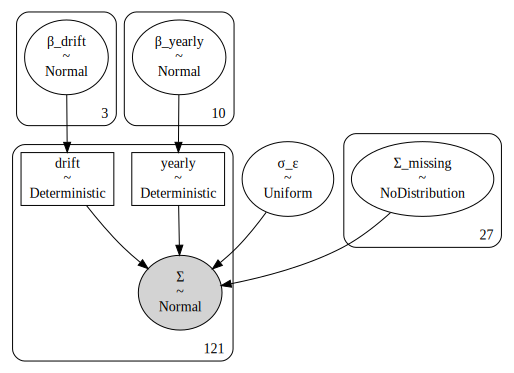

[Thu, 28 Oct 2021 16:39:00] INFO [forecast.py.determine_estimates] tune and sample model


INFO:SPARK:tune and sample model
/Users/Bram.Vonk/Projects/JADS/21_spark/notebooks/../src/forecast/forecast.py:67: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Σ_missing, σ_ε, β_yearly, β_drift]
INFO:pymc3:NUTS: [Σ_missing, σ_ε, β_yearly, β_drift]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8920286436929346, but should be close to 0.8. Try to increase the number of tuning steps.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The num

[Thu, 28 Oct 2021 16:39:34] INFO [forecast.py.determine_estimates] scale ouput data back


INFO:SPARK:scale ouput data back


[Thu, 28 Oct 2021 16:39:34] INFO [forecast.py.determine_estimates] format output data


INFO:SPARK:format output data


[Thu, 28 Oct 2021 16:39:34] INFO [format.py.format_model_estimates] calculating bands for quantiles: [1, 5, 50, 95, 99]


INFO:SPARK:calculating bands for quantiles: [1, 5, 50, 95, 99]


[Thu, 28 Oct 2021 16:39:34] INFO [format.py.format_model_estimates] calculating bands for variable: drift


INFO:SPARK:calculating bands for variable: drift


[Thu, 28 Oct 2021 16:39:34] INFO [format.py.format_model_estimates] calculating bands for variable: yearly


INFO:SPARK:calculating bands for variable: yearly


[Thu, 28 Oct 2021 16:39:34] INFO [format.py.format_model_estimates] calculating bands for variable: Σ


INFO:SPARK:calculating bands for variable: Σ


CPU times: user 15.5 s, sys: 2.46 s, total: 18 s
Wall time: 1min 24s


In [5]:
%%time
df_estimates = determine_estimates_minmax(df_train)
df_total=pd.concat([df_data, df_estimates], axis=0)

## plot results

In [6]:
plot_all(df_data=df_total, df_meta=df_meta)

alt.LayerChart(...)

In [8]:
plot_decompose(df=df_total.query("extreme == 'min'"))

alt.VConcatChart(...)

In [9]:
df_total

,boxid,date,l,processed_on,week,year,extreme,value,period,model_var,band,boundary
0,HVT.111153-1,2019-06-10,sumli,2021-10-07 07:03:50.602000+00:00,24,2019,max,78.797707,history,observed,NaN,NaN
1,HVT.111153-1,2019-06-17,sumli,2021-10-07 07:03:50.602000+00:00,25,2019,max,91.941017,history,observed,NaN,NaN
2,HVT.111153-1,2019-06-24,sumli,2021-10-07 07:03:50.602000+00:00,26,2019,max,100.725197,history,observed,NaN,NaN
3,HVT.111153-1,2019-07-01,sumli,2021-10-07 07:03:50.602000+00:00,27,2019,max,83.487396,history,observed,NaN,NaN
4,HVT.111153-1,2019-07-08,sumli,2021-10-07 07:03:50.602000+00:00,28,2019,max,91.487610,history,observed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
721,HVT.111153-1,2021-08-30,sumli,NaT,35,2021,max,129.740717,future,Σ,median,lower
722,HVT.111153-1,2021-09-06,sumli,NaT,36,2021,max,133.958580,future,Σ,median,lower
723,HVT.111153-1,2021-09-13,sumli,NaT,37,2021,max,137.037553,future,Σ,median,lower
724,HVT.111153-1,2021-09-20,sumli,NaT,38,2021,max,140.406872,future,Σ,median,lower
